In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy
import datetime

%pylab inline
pylab.rcParams['figure.figsize'] = (14, 8)

Populating the interactive namespace from numpy and matplotlib


In [2]:
users = pd.read_table('~/Columbia/Personalization Theory/lastfm-dataset-1K/userid-profile.tsv', header=0)
data = pd.read_table('~/Columbia/Personalization Theory/lastfm-dataset-1K/userid-timestamp-artid-artname-traid-traname.tsv', header=-1,
                     #nrows=20000000,
                     error_bad_lines=False)

b'Skipping line 2120260: expected 6 fields, saw 8\n'
b'Skipping line 2446318: expected 6 fields, saw 8\n'
b'Skipping line 11141081: expected 6 fields, saw 8\n'
b'Skipping line 11152099: expected 6 fields, saw 12\nSkipping line 11152402: expected 6 fields, saw 8\n'
b'Skipping line 11882087: expected 6 fields, saw 8\n'
b'Skipping line 12902539: expected 6 fields, saw 8\nSkipping line 12935044: expected 6 fields, saw 8\n'
b'Skipping line 17589539: expected 6 fields, saw 8\n'


In [3]:
data = data.rename(columns={0:'userid', 1:'timestamp', 2:'artistid', 3:'artistname', 4:'trackid', 5:'trackname'})
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.tail()

,userid,timestamp,artistid,artistname,trackid,trackname
19098848,user_001000,2008-01-27 22:02:35,9e53f84d-ef44-4c16-9677-5fd4d78cbd7d,Wilco,a490cabc-1e5c-4807-86c7-740c31a50009,Please Be Patient With Me
19098849,user_001000,2008-01-27 21:56:52,9e53f84d-ef44-4c16-9677-5fd4d78cbd7d,Wilco,3e92e447-9e1f-440d-bc00-6734469880c5,Shake It Off
19098850,user_001000,2008-01-27 21:52:36,9e53f84d-ef44-4c16-9677-5fd4d78cbd7d,Wilco,93d044e6-1bbb-46a6-ac8e-283382a89e6f,Side With The Seeds
19098851,user_001000,2008-01-27 21:49:12,9e53f84d-ef44-4c16-9677-5fd4d78cbd7d,Wilco,5ac4386f-6146-4389-a762-4b43f362d2c8,Sky Blue Sky
19098852,user_001000,2008-01-27 21:43:14,9e53f84d-ef44-4c16-9677-5fd4d78cbd7d,Wilco,3acc99bc-a349-420f-ad28-7095eb3533c9,Impossible Germany


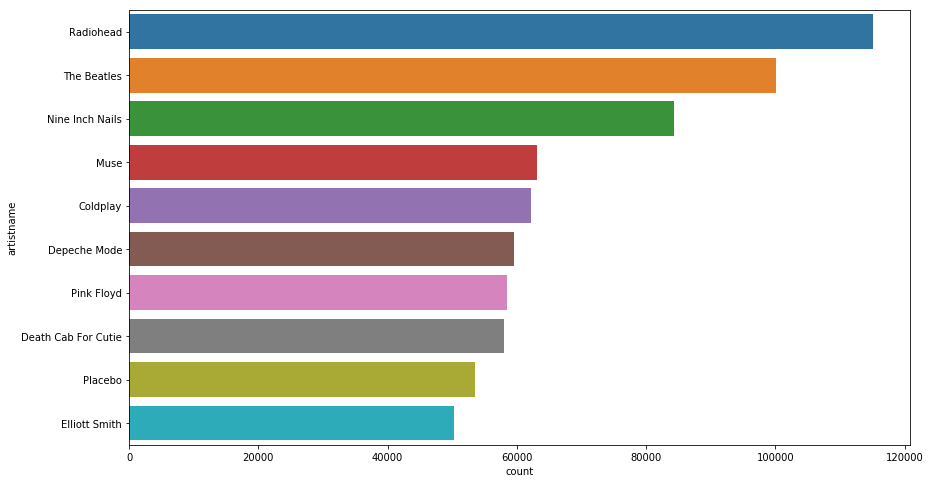

In [5]:
artists = data.groupby('artistname').size().reset_index(name="count")
top10 = artists.nlargest(10, 'count')

sns.barplot(x='count', y='artistname', data=top10)
plt.show()

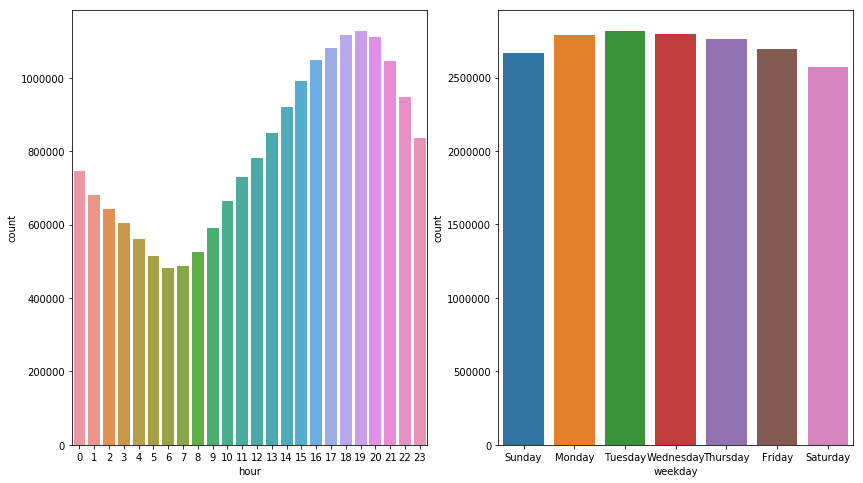

In [6]:
data['weekday'] = data['timestamp'].dt.weekday_name.astype('category',
                                                           categories=["Sunday","Monday","Tuesday","Wednesday",
                                                                       "Thursday","Friday","Saturday"],
                                                           ordered=True)
data['hour'] = data['timestamp'].dt.hour

fig, (ax1, ax2) = plt.subplots(ncols=2)
sns.countplot(x='hour', data=data, ax=ax1)
sns.countplot(x='weekday', data=data, ax=ax2)

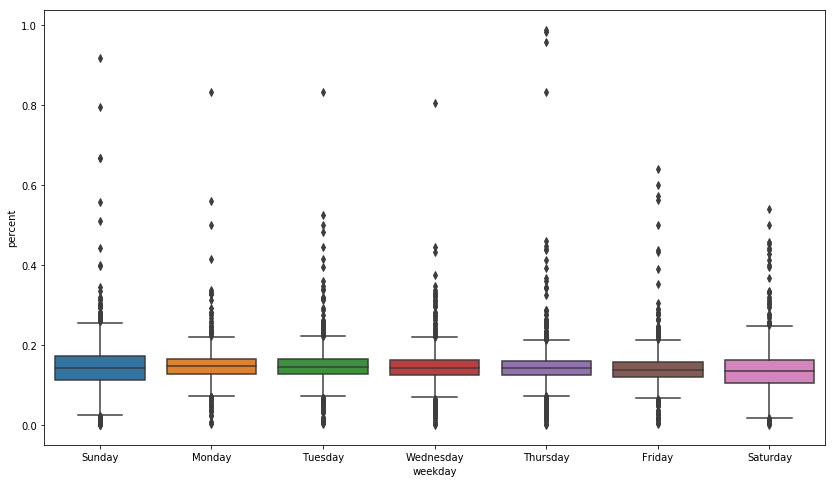

In [7]:
#average songs by day of week for each user
rawcount = data.groupby(['userid','weekday']).size().reset_index(name="songs")
usercount = data.groupby('userid').size().reset_index(name="songs_total")
weekdaypct = pd.merge(rawcount, usercount)
#weekdaypct['percentage'] = weekdaypct['songs']/weekdaypct/['songs_total']
weekdaypct['percent'] = weekdaypct['songs']/weekdaypct['songs_total']
weekdaypct.drop(['songs_total'],inplace=True,axis=1)
#weekdaypct.head(10)



#sns.stripplot(x="weekday", y="percent", data=weekdaypct, jitter=True)
sns.boxplot(x="weekday", y="percent", data=weekdaypct)

In [8]:
data = data.sort_values(['userid','timestamp'], ascending=True)
data['songlength'] = data.groupby('userid')['timestamp'].diff()
data.groupby('userid').head(2)

,userid,timestamp,artistid,artistname,trackid,trackname,weekday,hour,songlength
16684,user_000001,2006-08-13 13:59:20,09a114d9-7723-4e14-b524-379697f6d2b5,Plaid & Bob Jaroc,c4633ab1-e715-477f-8685-afa5f2058e42,The Launching Of Big Face,Sunday,13,NaT
16683,user_000001,2006-08-13 14:03:29,09a114d9-7723-4e14-b524-379697f6d2b5,Plaid & Bob Jaroc,bc2765af-208c-44c5-b3b0-cf597a646660,Zn Zero,Sunday,14,0 days 00:04:09
74122,user_000002,2006-02-24 18:05:42,92e634a7-6023-4be8-be15-ebba822f5b34,Maxïmo Park,1133b71f-171a-4872-bbee-c0054bfa8332,Apply Some Pressure,Friday,18,NaT
74121,user_000002,2006-02-24 18:09:26,8c538f11-c141-4588-8ecb-931083524186,Bloc Party,4120ba2d-33cc-4868-a34a-7bf15ddd11c6,Plans,Friday,18,0 days 00:03:44
93616,user_000003,2005-10-30 22:23:21,b9472588-93f3-4922-a1a2-74082cdf9ce8,Panic At The Disco,aca058fc-a41c-4d46-87a4-1819f8d6ea06,The Only Difference Between Martyrdom And Suic...,Sunday,22,NaT
93615,user_000003,2005-10-30 22:29:31,b9472588-93f3-4922-a1a2-74082cdf9ce8,Panic At The Disco,b5f701a7-3625-4dee-a147-6a9817e4f7b8,"Nails For Breakfast, Tacks For Snacks",Sunday,22,0 days 00:06:10
112027,user_000004,2007-04-19 19:15:15,1b882337-341c-4fc2-bb68-07ca0c3d27d2,Puressence,NaN,Sickofwaiting,Thursday,19,NaT
112026,user_000004,2007-04-19 19:19:24,1b882337-341c-4fc2-bb68-07ca0c3d27d2,Puressence,edb1199a-9b32-4eb6-a752-1b218e6e571e,Turn The Lights Out When I Die,Thursday,19,0 days 00:04:09
132368,user_000005,2006-08-12 16:36:44,0e43293c-1cac-43bd-a1a1-8668c7101450,Karmah,48ccc174-6409-49ca-8fcc-cdc4d2118ae0,Just Be Good To Me,Saturday,16,NaT
132367,user_000005,2006-08-12 16:40:54,e012afee-b0df-4d38-b256-d39cdb355ee3,Sebastian Hämer,0e061c94-4bbe-4024-bc23-d508749f16d7,Sommer Unseres Lebens,Saturday,16,0 days 00:04:10


In [9]:
data['skipped'] = (data.songlength  < datetime.timedelta(minutes=1)).astype('int')

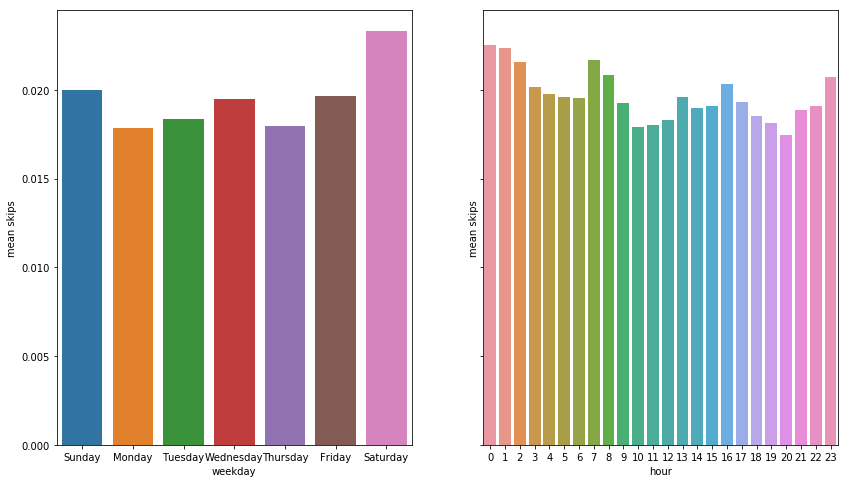

In [10]:
hourskips = pd.DataFrame(data.groupby('hour')['skipped'].mean())
hourskips.columns = (['mean skips'])
hourskips['hour'] = hourskips.index

dayskips = pd.DataFrame(data.groupby('weekday')['skipped'].mean())
dayskips.columns = (['mean skips'])
dayskips['weekday'] = dayskips.index

fig=plt.figure(figsize=(20, 16))
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.barplot(y='mean skips', x='weekday', data=dayskips, ax=ax1)
sns.barplot(y='mean skips', x='hour', data=hourskips, ax=ax2)